<a href="https://colab.research.google.com/github/Sridevi-SV/demand-forecasting-inventory-decision/blob/main/demand_forecasting_inventory_decision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import zipfile

zip_path = "/content/drive/MyDrive/walmart_dataset.zip"
extract_path = "/content/drive/MyDrive/walmart_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipped successfully")


Unzipped successfully


In [4]:
import os

os.listdir("/content/drive/MyDrive/walmart_data")


['train.csv', 'stores.csv', 'features.csv', 'test.csv']

In [5]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/walmart_data/train.csv")
print(df.shape)
df.head()


(421570, 5)


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [6]:
df['Store'].value_counts()

,count
Store,
13,10474
10,10315
4,10272
1,10244
2,10238
24,10228
27,10225
34,10224
20,10214


In [7]:
df['Store'].nunique(), df['Store'].unique()[:]


(45,
 array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45]))

In [8]:
df_store = df[df['Store'] == 13].copy()
df_store

,Store,Dept,Date,Weekly_Sales,IsHoliday
117606,13,1,2010-02-05,46761.90,False
117607,13,1,2010-02-12,78415.94,True
117608,13,1,2010-02-19,44042.19,False
117609,13,1,2010-02-26,31574.04,False
117610,13,1,2010-03-05,34505.07,False
...,...,...,...,...,...
128075,13,99,2012-09-07,10.10,True
128076,13,99,2012-09-14,0.17,False
128077,13,99,2012-09-21,59.83,False
128078,13,99,2012-10-05,1130.00,False


In [9]:
df_store['Date'] = pd.to_datetime(df_store['Date'])
df_store

,Store,Dept,Date,Weekly_Sales,IsHoliday
117606,13,1,2010-02-05,46761.90,False
117607,13,1,2010-02-12,78415.94,True
117608,13,1,2010-02-19,44042.19,False
117609,13,1,2010-02-26,31574.04,False
117610,13,1,2010-03-05,34505.07,False
...,...,...,...,...,...
128075,13,99,2012-09-07,10.10,True
128076,13,99,2012-09-14,0.17,False
128077,13,99,2012-09-21,59.83,False
128078,13,99,2012-10-05,1130.00,False


In [10]:
df_store = df_store.sort_values('Date')
df_store

,Store,Dept,Date,Weekly_Sales,IsHoliday
117606,13,1,2010-02-05,46761.90,False
119465,13,14,2010-02-05,26778.00,False
121584,13,30,2010-02-05,4762.50,False
121012,13,26,2010-02-05,13248.53,False
120869,13,25,2010-02-05,9751.48,False
...,...,...,...,...,...
120725,13,23,2012-10-26,40228.51,False
123156,13,41,2012-10-26,2820.28,False
120868,13,24,2012-10-26,17336.40,False
120439,13,21,2012-10-26,7766.34,False


In [11]:
df_store[['Date', 'Weekly_Sales']].head()


,Date,Weekly_Sales
117606,2010-02-05,46761.90
119465,2010-02-05,26778.00
121584,2010-02-05,4762.50
121012,2010-02-05,13248.53
120869,2010-02-05,9751.48


In [12]:
df_store.shape

(10474, 5)

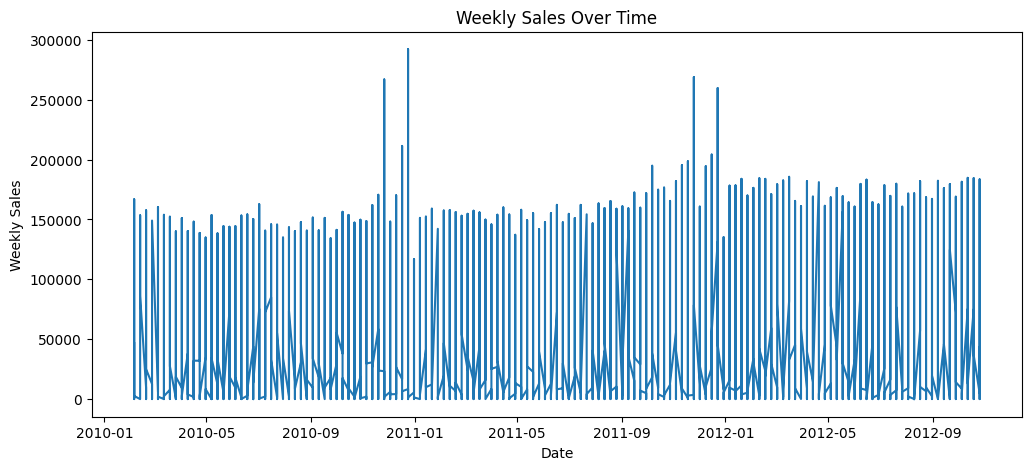

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.plot(df_store['Date'], df_store['Weekly_Sales'])
plt.title("Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


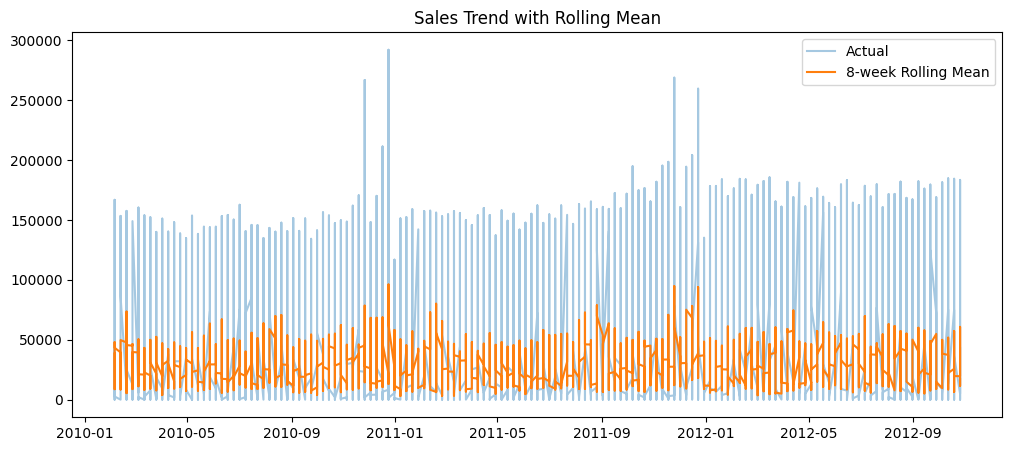

In [14]:
df_store['rolling_mean'] = df_store['Weekly_Sales'].rolling(window=8).mean()

plt.figure(figsize=(12,5))
plt.plot(df_store['Date'], df_store['Weekly_Sales'], alpha=0.4, label='Actual')
plt.plot(df_store['Date'], df_store['rolling_mean'], label='8-week Rolling Mean')
plt.legend()
plt.title("Sales Trend with Rolling Mean")
plt.show()


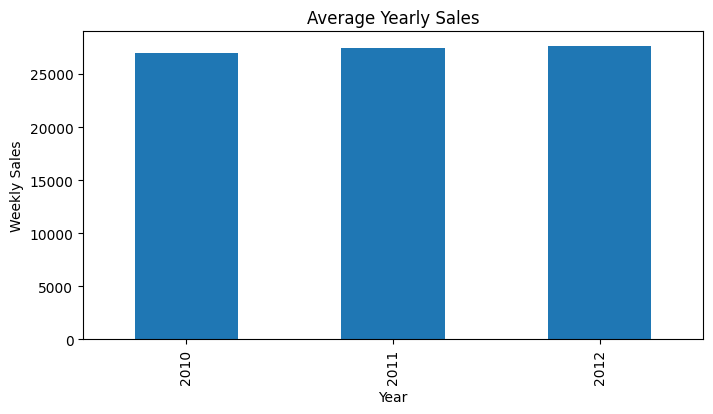

In [15]:
df_store['Year'] = df_store['Date'].dt.year

df_store.groupby('Year')['Weekly_Sales'].mean().plot(kind='bar', figsize=(8,4))
plt.title("Average Yearly Sales")
plt.ylabel("Weekly Sales")
plt.show()


In [16]:
!pip install prophet


In [17]:
from prophet import Prophet


In [18]:
prophet_df = df_store[['Date', 'Weekly_Sales']].rename(
    columns={'Date': 'ds', 'Weekly_Sales': 'y'}
)


In [19]:
prophet_df.head()


,ds,y
117606,2010-02-05,46761.90
119465,2010-02-05,26778.00
121584,2010-02-05,4762.50
121012,2010-02-05,13248.53
120869,2010-02-05,9751.48


In [20]:
model = Prophet()
model.fit(prophet_df)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
future = model.make_future_dataframe(periods=12, freq='W')


In [22]:
forecast = model.predict(future)


In [23]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
150,2012-12-16,40600.548175,-430.945109,83177.002423
151,2012-12-23,39545.122677,-2288.108538,82700.103810
152,2012-12-30,34237.918607,-12280.493762,79155.098335
153,2013-01-06,27659.114616,-16603.807024,70201.349196
154,2013-01-13,23696.434993,-20166.749719,68429.250349


In [24]:
future_forecast = forecast[forecast['ds'] > df_store['Date'].max()].copy()
future_forecast[['ds', 'yhat', 'yhat_upper']].head()


,ds,yhat,yhat_upper
143,2012-10-28,27552.459126,71064.562907
144,2012-11-04,29127.194295,73082.642300
145,2012-11-11,30681.875578,73396.563479
146,2012-11-18,31350.419784,76004.179392
147,2012-11-25,31954.321406,74899.793555


In [25]:
avg_weekly_sales = df_store['Weekly_Sales'].mean()

current_inventory = avg_weekly_sales * 2      # 2 weeks stock
safety_stock = 0.2 * future_forecast['yhat']  # 20% buffer


In [26]:
future_forecast['reorder_qty'] = (
    future_forecast['yhat'] + safety_stock - current_inventory
)

future_forecast['reorder_qty'] = future_forecast['reorder_qty'].apply(
    lambda x: max(x, 0)
)


In [27]:
future_forecast[['ds', 'yhat', 'yhat_upper', 'reorder_qty']]


,ds,yhat,yhat_upper,reorder_qty
143,2012-10-28,27552.459126,71064.562907,0
144,2012-11-04,29127.194295,73082.642300,0
145,2012-11-11,30681.875578,73396.563479,0
146,2012-11-18,31350.419784,76004.179392,0
147,2012-11-25,31954.321406,74899.793555,0
148,2012-12-02,34093.355259,76260.850515,0
149,2012-12-09,37797.102798,83296.991208,0
150,2012-12-16,40600.548175,83177.002423,0
151,2012-12-23,39545.122677,82700.103810,0
152,2012-12-30,34237.918607,79155.098335,0


## Business Insights & Inventory Decisions

- Forecasted demand shows post-holiday decline with high short-term volatility.
- Inventory decisions based only on average demand risk stockouts during peak weeks.
- Incorporating safety stock based on forecast uncertainty reduces stockout risk.
- Reorder quantities were dynamically adjusted using forecasted demand and buffer stock assumptions.
